In [ ]:
pip install langchain langgraph


INFO: pip is looking at multiple versions of langgraph-prebuilt to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langgraph-prebuilt to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 19.5 MB/s eta 0:00:00


In [2]:
pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.2/471.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.4 which is incompatible.


In [3]:
from langgraph.graph import StateGraph, END

#state = {"message": "Hello, world"}

def hello_node(state):
    state["message"] = "Hello, world"

    return state

state_schema = dict  #we use TypeDict (real world apps)

#graph
graph = StateGraph(state_schema) #creates a graph thats gonna : add edges, nodes, holds state
graph.add_node("hello", hello_node)

graph.set_entry_point("hello")
graph.add_edge("hello", END)

#start -> hello -> END
app = graph.compile()

print(app)

result_state = app.invoke({})      # pass initial empty state
print("\nFinal state returned by graph:")
print(result_state)


Inside node: wrote message to state.

Final state returned by graph:
{'message': 'Hello, world from LangGraph!'}


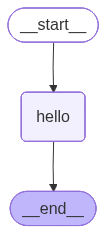

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [4]:
graph.nodes

{'hello': StateNodeSpec(runnable=hello(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class 'dict'>, retry_policy=None, cache_policy=None, ends=(), defer=False)}

In [5]:
graph.edges

{('__start__', 'hello'), ('hello', '__end__')}

## multiple nodes





In [ ]:
from langgraph.graph import StateGraph, END

#greet node
def greeting_node(state):
    name = state.get("name", "there")
    state["greeting"] = f"Hello, {name}!"
    print(f"greeting_node: Created greeting for {name}")
    return state

#calc node
def age_node(state):
    age = state.get("age", 0)
    state["future_age"] = age + 10
    print(f"age_node: Calculated future age {age} + 10 = {state['future_age']}")
    return state

#mesage node
def final_message_node(state):
    name = state.get("name", "there")
    greeting = state.get("greeting", "")
    future_age = state.get("future_age", 0)
    state["message"] = f"{greeting} You are {state['age']} now, and in 10 years you'll be {future_age}."
    print("final_message_node: Created final message.")
    return state

graph = StateGraph(dict)
graph.add_node("greet", greeting_node)
graph.add_node("age_calc", age_node)
graph.add_node("final", final_message_node)

graph.set_entry_point("greet")
graph.add_edge("greet", "age_calc")
graph.add_edge("age_calc", "final")
graph.add_edge("final", END)

app = graph.compile()

initial_state = {"name": "Yashitha", "age": 20}

result = app.invoke(initial_state)

print("\n=== FINAL STATE ===")
print(result)
print("\nFinal message:")
print(result["message"])



greeting_node: Created greeting for Yashitha
age_node: Calculated future age 20 + 10 = 30
final_message_node: Created final message.

=== FINAL STATE ===
{'name': 'Yashitha', 'age': 20, 'greeting': 'Hello, Yashitha!', 'future_age': 30, 'message': "Hello, Yashitha! You are 20 now, and in 10 years you'll be 30."}

Final message:
Hello, Yashitha! You are 20 now, and in 10 years you'll be 30.


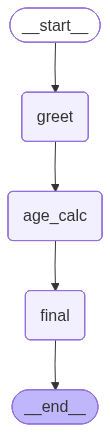

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
from langgraph.graph import StateGraph, END

#greet node
def greeting_node(state):
    name = state.get("name", "there")
    state["greeting"] = f"Hello, {name}!"
    print(f"greeting_node: Created greeting for {name}")
    return state

#calc node
def age_node(state):
    age = state.get("age", 0)
    state["future_age"] = age + 10
    print(f"age_node: Calculated future age {age} + 10 = {state['future_age']}")
    return state

#mesage node
def final_message_node(state):
    name = state.get("name", "there")
    greeting = state.get("greeting", "")
    future_age = state.get("future_age", 0)
    state["message"] = f"{greeting} You are {state['age']} now, and in 10 years you'll be {future_age}."
    print("final_message_node: Created final message.")
    return state

graph = StateGraph(dict)
graph.add_node("greet", greeting_node)
graph.add_node("age_calc", age_node)
graph.add_node("final", final_message_node)

graph.set_entry_point("greet")
graph.add_edge("greet", "age_calc")
graph.add_edge("age_calc", "final")
graph.add_edge("final", END)

app = graph.compile()


# take it dynamically :
#initial_state = {"name": "Yashitha", "age": 20}
name = input("Please enter your Name? ")
age = int(input("please enter your Age? "))
initial_state = {"name": name, "age": age}

result = app.invoke(initial_state)

print("\n=== FINAL STATE ===")
print(result)
print("\nFinal message:")
print(result["message"])



Please enter your Name? yashitha 
please enter your Age? 20
greeting_node: Created greeting for yashitha 
age_node: Calculated future age 20 + 10 = 30
final_message_node: Created final message.

=== FINAL STATE ===
{'name': 'yashitha ', 'age': 20, 'greeting': 'Hello, yashitha !', 'future_age': 30, 'message': "Hello, yashitha ! You are 20 now, and in 10 years you'll be 30."}

Final message:
Hello, yashitha ! You are 20 now, and in 10 years you'll be 30.


##Conditional graphs:

In [8]:
from langgraph.graph import StateGraph, END

def start(state):
    age = state.get("age", 0)
    state["is_unc"] = age >= 20
    print(f"start: age={age}, is_unc={state['is_unc']}")
    return state

def kid(state):
    state["msg"] = f"You're {state['age']} — a kid"
    return state

def unc(state):
    state["msg"] = f"You're {state['age']} — an unc!"
    return state

def route(state):  # decide which branch to take
    return "unc" if state["is_unc"] else "kid"

graph = StateGraph(dict)
graph.add_node("start", start)
graph.add_node("kid", kid)
graph.add_node("unc", unc)

graph.set_entry_point("start")
graph.add_conditional_edges("start", route)
graph.add_edge("kid", END)
graph.add_edge("unc", END)

app = graph.compile()
print(app.invoke({"age": 15}))
print(app.invoke({"age": 22}))


start: age=15, is_unc=False
{'age': 15, 'is_unc': False, 'msg': "You're 15 — a kid"}
start: age=22, is_unc=True
{'age': 22, 'is_unc': True, 'msg': "You're 22 — an unc!"}


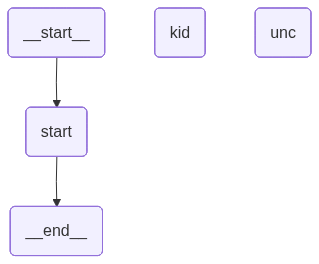

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))